# Wavelet Transform in Machine Learning

https://ataspinar.com/posts/a-guide-for-using-the-wavelet-transform-in-machine-learning/

In [118]:
import pywt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from S00_utils import loadPickle, savePickle, aTime


In [119]:
filepath = "output/S11__2025-04-21-052441.pickle"
dfData = loadPickle(filepath)

In [120]:
def plot_wavelet(
    time,
    signal,
    scales,
    waveletname="cmor",
    cmap=plt.cm.seismic,
    title="Wavelet Transform (Power Spectrum) of signal",
    ylabel="Period (years)",
    xlabel="Time",
):
    dt = time[1] - time[0]
    [coefficients, frequencies] = pywt.cwt(signal, scales, waveletname, dt)
    power = (abs(coefficients)) ** 2
    period = 1.0 / frequencies
    levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8]
    contourlevels = np.log2(levels)

    fig, ax = plt.subplots(figsize=(15, 10))
    im = ax.contourf(
        time, np.log2(period), np.log2(power), contourlevels, extend="both", cmap=cmap
    )

    ax.set_title(title, fontsize=20)
    ax.set_ylabel(ylabel, fontsize=18)
    ax.set_xlabel(xlabel, fontsize=18)

    yticks = 2 ** np.arange(
        np.ceil(np.log2(period.min())), np.ceil(np.log2(period.max()))
    )
    ax.set_yticks(np.log2(yticks))
    ax.set_yticklabels(yticks)
    ax.invert_yaxis()
    ylim = ax.get_ylim()
    ax.set_ylim(ylim[0], -1)

    cbar_ax = fig.add_axes([0.95, 0.5, 0.03, 0.25])
    fig.colorbar(im, cax=cbar_ax, orientation="vertical")
    plt.show()

In [121]:
# Example

# dataset = "http://paos.colorado.edu/research/wavelets/wave_idl/sst_nino3.dat"
# df_nino = pd.read_table(dataset)
# N = df_nino.shape[0]
# t0=1871
# dt=0.25
# time = np.arange(0, N) * dt + t0
# signal = df_nino.values.squeeze()

# scales = np.arange(1, 128)
# plot_wavelet(time, signal, scales)

In [122]:
tsArr = dfData["ts"].values

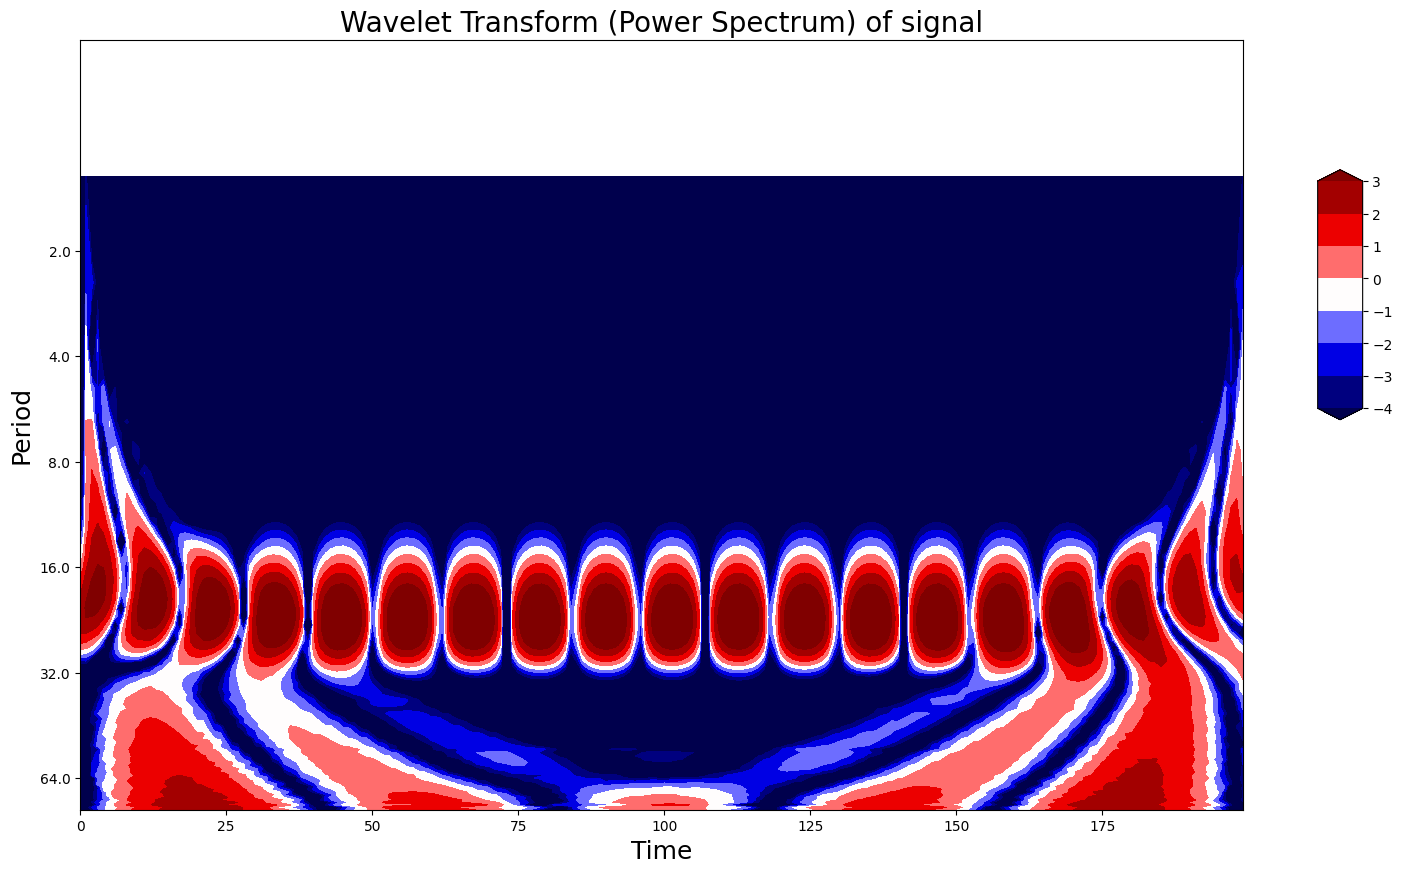

In [123]:
idx = 11
n_scales = 64
time = tsArr[idx][0]
signal = ts_val = tsArr[idx][1]
scales = np.arange(1, n_scales + 1)
waveletname = "morl"
time_cufoff = 200
#
plot_wavelet(
    time[:time_cufoff], signal[:time_cufoff], scales, waveletname=waveletname, xlabel="Time", ylabel="Period"
)

In [124]:
coeff, freq = pywt.cwt(signal, scales, waveletname, 1)
print(signal.shape)
print(scales.shape)
print(coeff.shape)

(238,)
(64,)
(64, 238)


In [125]:
train_size = dfData.shape[0]
time_cutoff = 200
n_scales = 64
waveletname = "morl"

# Shape (N, C, H, W)
data_train = np.ndarray(shape=(train_size, 1, n_scales, time_cutoff))
scales = np.arange(1, n_scales + 1)
for ii in range(0, train_size):    
    time = tsArr[idx][0]
    signal = ts_val = tsArr[idx][1]
    dt = time[1] - time[0]
    [coeff, freq] = pywt.cwt(signal[:time_cutoff], scales[:time_cutoff], waveletname, dt)
    data_train[ii, 0, :, :] = coeff


In [126]:
filename = f"{aTime('S22')}.pickle"
filepath = f"output/{filename}"
savePickle(filepath=filepath, data=data_train)

S22__2025-04-21-062139
